# Zelp Coding Assessment by Agata Czap


Run on T4 GPU, Google Colab Jupyter Notebook, Python 3.
Code written by Agata Czap.
Data provided by Zelp.

## Data Cleanup

Using standard Python libraries for data cleanup, exploratory analysis and statistical tests.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
df_cowA_gas = pd.read_csv("cowA_gas.csv")
df_cowA_therm_0 = pd.read_csv("cowA_therm-0.csv")
df_cowA_therm_2 = pd.read_csv("cowA_therm-2.csv")
df_cowB_gas = pd.read_csv("cowB_gas.csv")
df_cowB_therm_0 = pd.read_csv("cowB_therm-0.csv")
df_cowB_therm_2 = pd.read_csv("cowB_therm-2.csv")

Change the epoch column name into time, but it didn't work.

In [ ]:
# Standardize timestamp column name
df_cowA_therm_0.rename(columns={"time_ms": "epoch_ms"}, inplace=True)
df_cowA_therm_2.rename(columns={"time_ms": "epoch_ms"}, inplace=True)
df_cowB_therm_0.rename(columns={"time_ms": "epoch_ms"}, inplace=True)
df_cowB_therm_2.rename(columns={"time_ms": "epoch_ms"}, inplace=True)

In [ ]:
# Add cow_id column
df_cowA_gas["cow_id"] = "cowA"
df_cowA_therm_0["cow_id"] = "cowA"
df_cowA_therm_2["cow_id"] = "cowA"
df_cowB_gas["cow_id"] = "cowB"
df_cowB_therm_0["cow_id"] = "cowB"
df_cowB_therm_2["cow_id"] = "cowB"

Decided to merge all 4 tables into 1, as this would make data cleanup and AI model training much easier.

1. Combine thermistor data together for each cow firsts, so thermistor 0 and 2 data together for cow A and then for cow B.
2. Combine new thermistor table and gas table for each cow.
3. Combine cow A and cow B data together.
4. Add cow ID column to know which data comes from each cow.

In [ ]:
# Merge thermistor data first
df_cowA_therm = pd.concat([df_cowA_therm_0, df_cowA_therm_2], ignore_index=True)
df_cowB_therm = pd.concat([df_cowB_therm_0, df_cowB_therm_2], ignore_index=True)

In [ ]:
# Merge gas and thermistor data for each cow
df_cowA = pd.merge(df_cowA_gas, df_cowA_therm, on=["epoch_ms", "cow_id"], how="outer")
df_cowB = pd.merge(df_cowB_gas, df_cowB_therm, on=["epoch_ms", "cow_id"], how="outer")

In [ ]:
# Combine all into one dataset
df_final = pd.concat([df_cowA, df_cowB], ignore_index=True)

Save a copy of the combined table into a CSV file.

In [ ]:
# Save to CSV
df_final.to_csv("merged_cow_data.csv", index=False)

Previewing the final table as the result as combining all 4 tables together.

In [ ]:
# Display sample
df_final.head(20)

,epoch_ms,co2,co2temp,ch4,ch4temp,cow_id,thermistor_id,temperature,raw
0,1.723507e+12,NaN,NaN,NaN,NaN,cowA,2.0,26.174637,1999.0
1,1.723507e+12,NaN,NaN,NaN,NaN,cowA,0.0,28.334112,1911.0
2,1.723507e+12,NaN,NaN,NaN,NaN,cowA,2.0,26.345016,1992.0
3,1.723507e+12,NaN,NaN,NaN,NaN,cowA,0.0,28.582122,1901.0
4,1.723507e+12,NaN,NaN,NaN,NaN,cowA,2.0,26.345016,1992.0
5,1.723507e+12,NaN,NaN,NaN,NaN,cowA,0.0,28.855607,1890.0
6,1.723507e+12,NaN,NaN,NaN,NaN,cowA,2.0,26.613211,1981.0
7,1.723507e+12,NaN,NaN,NaN,NaN,cowA,0.0,28.830715,1891.0
8,1.723507e+12,NaN,NaN,NaN,NaN,cowA,2.0,26.710878,1977.0
9,1.723507e+12,NaN,NaN,NaN,NaN,cowA,0.0,29.079906,1881.0


In [ ]:
df_final.tail()

,epoch_ms,co2,co2temp,ch4,ch4temp,cow_id,thermistor_id,temperature,raw
415877,NaN,NaN,NaN,NaN,NaN,cowB,NaN,NaN,NaN
415878,NaN,NaN,NaN,NaN,NaN,cowB,NaN,NaN,NaN
415879,NaN,NaN,NaN,NaN,NaN,cowB,NaN,NaN,NaN
415880,NaN,NaN,NaN,NaN,NaN,cowB,NaN,NaN,NaN
415881,NaN,NaN,NaN,NaN,NaN,cowB,NaN,NaN,NaN


Looking at the size of the final table, what data type each column is.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415882 entries, 0 to 415881
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   epoch_ms       412258 non-null  float64
 1   co2            15974 non-null   float64
 2   co2temp        15974 non-null   float64
 3   ch4            15974 non-null   float64
 4   ch4temp        15974 non-null   float64
 5   cow_id         415882 non-null  object 
 6   thermistor_id  396372 non-null  float64
 7   temperature    396372 non-null  float64
 8   raw            396372 non-null  float64
dtypes: float64(8), object(1)
memory usage: 28.6+ MB


Summary statistics for every column.

In [ ]:
df_final.describe()

,epoch_ms,co2,co2temp,ch4,ch4temp,thermistor_id,temperature,raw
count,4.122580e+05,15974.000000,15974.000000,15974.000000,1.597400e+04,396372.000000,396372.000000,396372.000000
mean,1.723573e+12,1.307322,35.380736,0.133867,3.385000e+01,1.003477,28.443059,1908.299353
std,6.398812e+07,0.646197,0.499070,0.106414,6.565620e-12,0.999995,3.338234,120.646687
min,1.723507e+12,0.217000,34.849998,0.037000,3.385000e+01,0.000000,-273.150000,0.000000
25%,1.723509e+12,0.831000,34.849998,0.072000,3.385000e+01,0.000000,26.759740,1829.000000
50%,1.723635e+12,1.150000,35.849998,0.092000,3.385000e+01,2.000000,28.681488,1897.000000
75%,1.723637e+12,1.734000,35.849998,0.151143,3.385000e+01,2.000000,30.385880,1975.000000
max,1.723639e+12,3.630000,35.849998,0.805000,3.385000e+01,2.000000,206.535572,2240.000000


Looking at how many NA values there are for each variable. Too many NA values, I have too few values to impute and replace NA value with mean or median, would cause problems down the line.

In [ ]:
df_final.isna().sum()

,0
epoch_ms,3624
co2,399908
co2temp,399908
ch4,399908
ch4temp,399908
cow_id,0
thermistor_id,19510
temperature,19510
raw,19510


Decided to remove all NA values to avoid having problems with AI model predictions later.

In [ ]:
df_final = df_final.dropna()

In [ ]:
df_final.isna().sum()

,0
epoch_ms,0
co2,0
co2temp,0
ch4,0
ch4temp,0
cow_id,0
thermistor_id,0
temperature,0
raw,0


Checking the final size of the table, 118 rows and 9 columns, much smaller than original. Will choose a simple AI model to deal with small dataset.

In [ ]:
df_final.shape

(118, 9)

## Exploratory Data Analysis

After combining all 4 tables together, I looked at relationships between different variables / columns in the table, and how they differ for each cow.

In [ ]:
df_final.head(20)

,epoch_ms,co2,co2temp,ch4,ch4temp,cow_id,thermistor_id,temperature,raw
673,1.723507e+12,0.717,34.849998,0.079000,33.849998,cowA,2.0,24.602546,2064.0
12423,1.723507e+12,0.658,34.849998,0.082000,33.849998,cowA,0.0,30.512402,1824.0
26930,1.723508e+12,0.627,34.849998,0.066000,33.849998,cowA,0.0,31.710467,1777.0
26931,1.723508e+12,0.627,34.849998,0.066000,33.849998,cowA,2.0,29.179752,1877.0
38993,1.723508e+12,0.820,34.849998,0.069000,33.849998,cowA,2.0,27.987850,1925.0
39981,1.723508e+12,0.635,34.849998,0.098000,33.849998,cowA,2.0,29.831203,1851.0
53291,1.723508e+12,1.118,34.849998,0.096000,33.849998,cowA,2.0,28.606955,1900.0
81214,1.723509e+12,0.644,34.849998,0.073000,33.849998,cowA,0.0,30.335320,1831.0
114489,1.723509e+12,0.680,34.849998,0.120001,33.849998,cowA,2.0,27.642667,1939.0
117087,1.723510e+12,0.988,34.849998,0.173447,33.849998,cowA,2.0,25.229316,2038.0


Using boxplot to visualise temperature for both cows and seeing the differences, clearly cow B has much bigger range of temperature.

<Axes: xlabel='cow_id', ylabel='temperature'>

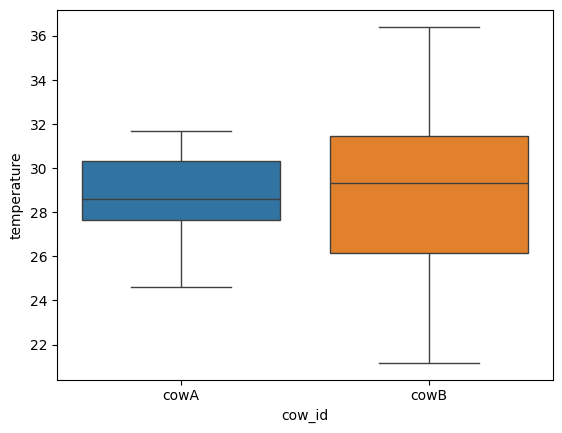

In [ ]:
sns.boxplot(x='cow_id',y='temperature',data=df_final, hue='cow_id')

Summary statistics for temperature, grouped by each cow.

In [ ]:
df_final.groupby('cow_id')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
cow_id,,,,,,,,
cowA,13.0,28.433108,2.222089,24.602546,27.642667,28.606955,30.335320,31.710467
cowB,105.0,28.556502,3.600185,21.170641,26.150316,29.329708,31.479786,36.416957


Same plots for CO2 and CH4 for each cow, cow B has more changes in concentrations of both gases which reflects changes in temperature, must be correlated.

<Axes: xlabel='cow_id', ylabel='co2'>

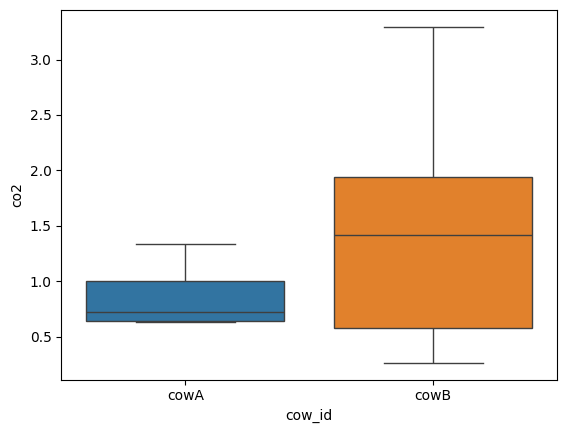

In [ ]:
sns.boxplot(x='cow_id',y='co2',data=df_final, hue='cow_id')

In [ ]:
df_final.groupby('cow_id')['co2'].describe()

,count,mean,std,min,25%,50%,75%,max
cow_id,,,,,,,,
cowA,9.0,0.931667,0.251559,0.635,0.680,0.988,1.118,1.335
cowB,105.0,1.395962,0.770944,0.263,0.576,1.413,1.941,3.296


<Axes: xlabel='cow_id', ylabel='ch4'>

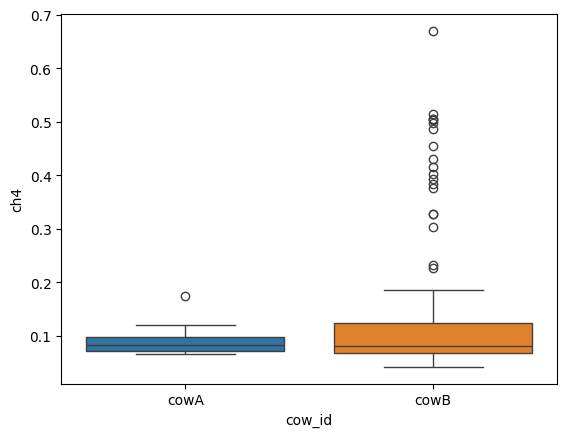

In [ ]:
sns.boxplot(x='cow_id',y='ch4',data=df_final, hue='cow_id')

In [ ]:
df_final.groupby('cow_id')['ch4'].describe()

,count,mean,std,min,25%,50%,75%,max
cow_id,,,,,,,,
cowA,9.0,0.100605,0.033431,0.069,0.073,0.096,0.120,0.173447
cowB,105.0,0.143867,0.139784,0.042,0.067,0.081,0.124,0.670000


Plotting CO2 and CH4 concentration changes over time with a line plot, coloured by cow ID, red for cow A and blue for cow B.
Could have plotted all graphs into one same grid but the resulting plot causes all values to squish together in every plot and this didn't look good.

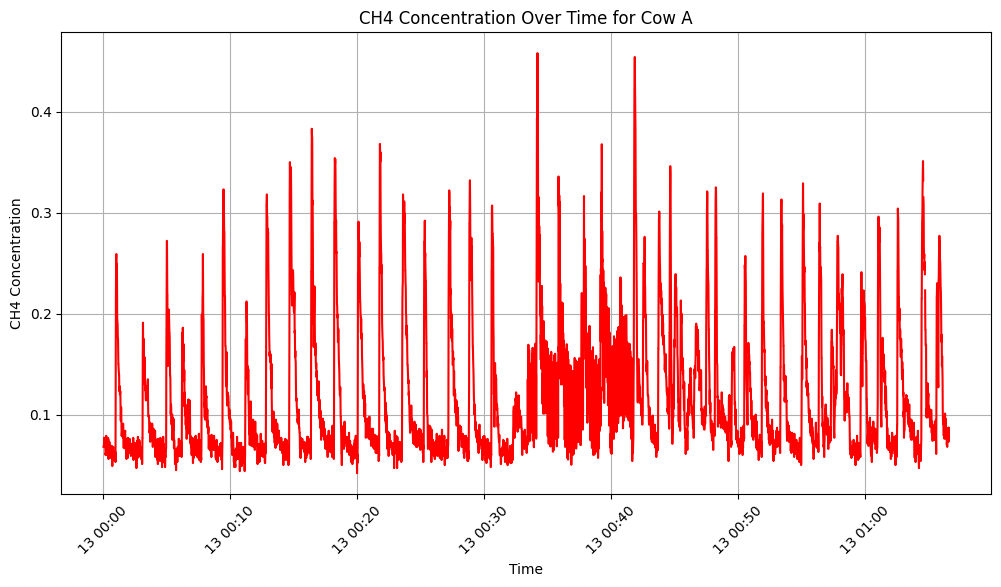

In [ ]:
# Plot CH4 concentration over time for Cow A
df_cowA_gas["Time"] = pd.to_datetime(df_cowA_gas["epoch_ms"], unit="ms")
plt.figure(figsize=(12, 6))
plt.plot(df_cowA_gas["Time"], df_cowA_gas["ch4"], color="red")
plt.xlabel("Time")
plt.ylabel("CH4 Concentration")
plt.title("CH4 Concentration Over Time for Cow A")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df_final.columns.tolist())

['epoch_ms', 'co2', 'co2temp', 'ch4', 'ch4temp', 'cow_id', 'thermistor_id', 'temperature', 'raw']


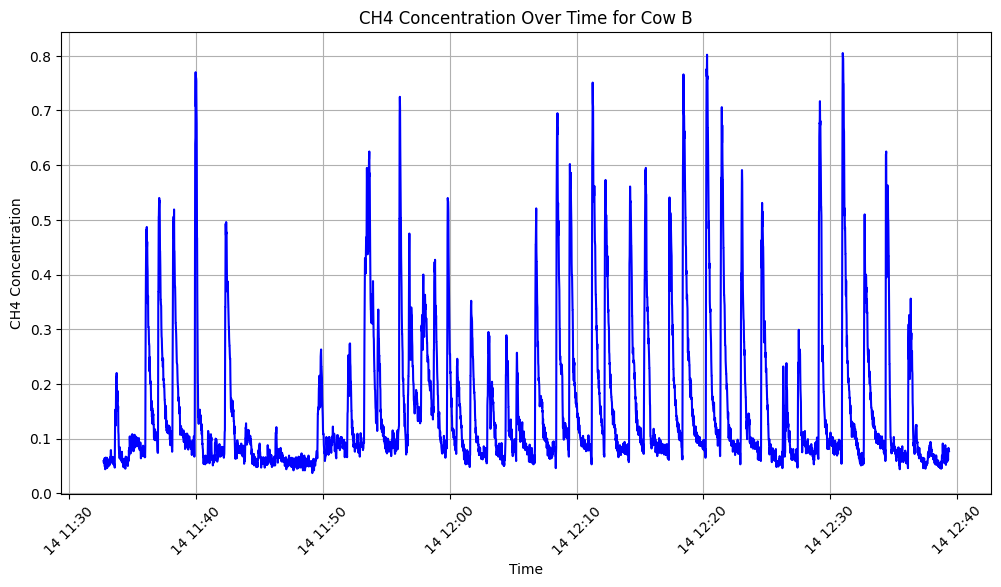

In [ ]:
# Plot CH4 concentration over time for Cow B
df_cowB_gas["Time"] = pd.to_datetime(df_cowB_gas["epoch_ms"], unit="ms")
plt.figure(figsize=(12, 6))
plt.plot(df_cowB_gas["Time"], df_cowB_gas["ch4"], color="blue")
plt.xlabel("Time")
plt.ylabel("CH4 Concentration")
plt.title("CH4 Concentration Over Time for Cow B")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

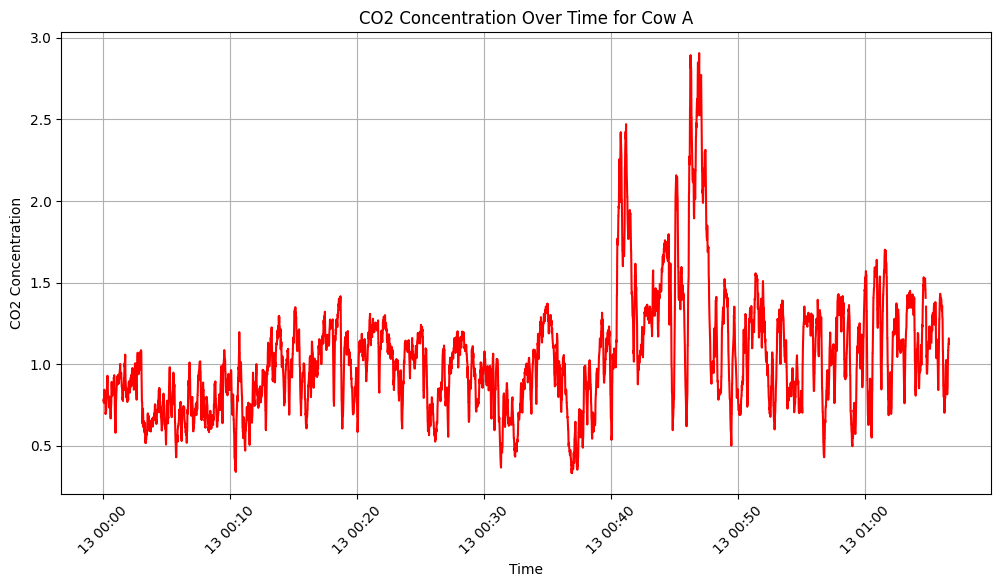

In [ ]:
# Plot CO2 concentration over time for Cow A
df_cowA_gas["Time"] = pd.to_datetime(df_cowA_gas["epoch_ms"], unit="ms")
plt.figure(figsize=(12, 6))
plt.plot(df_cowA_gas["Time"], df_cowA_gas["co2"], color="red")
plt.xlabel("Time")
plt.ylabel("CO2 Concentration")
plt.title("CO2 Concentration Over Time for Cow A")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

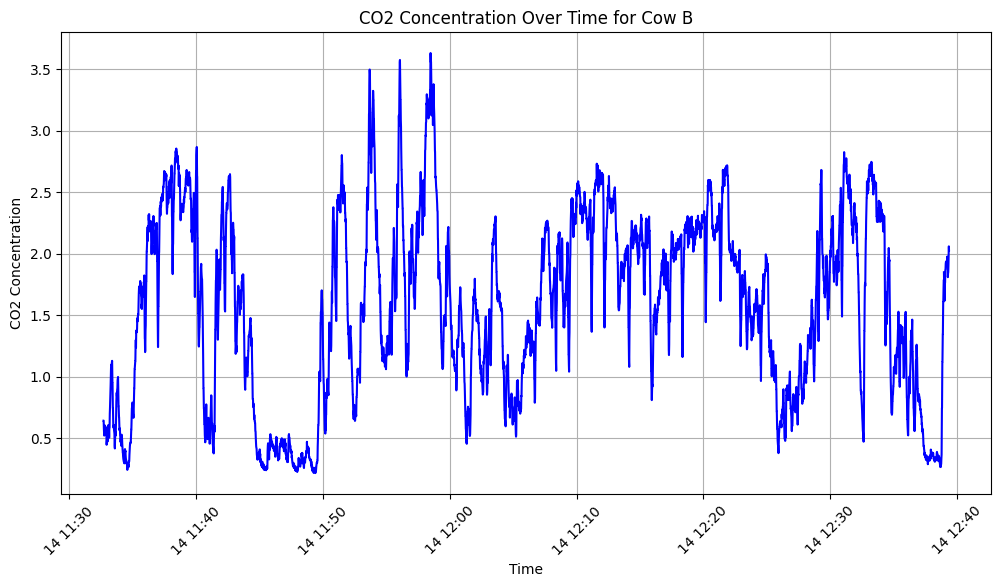

In [ ]:
# Plot CO2 concentration over time for Cow B
df_cowA_gas["Time"] = pd.to_datetime(df_cowB_gas["epoch_ms"], unit="ms")
plt.figure(figsize=(12, 6))
plt.plot(df_cowA_gas["Time"], df_cowB_gas["co2"], color="blue")
plt.xlabel("Time")
plt.ylabel("CO2 Concentration")
plt.title("CO2 Concentration Over Time for Cow B")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Importing the right Python libraries for AI and feature engineering.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression

## Feature Engineering:

**Eructation is defined as CH4 expelled suddenly out of the cow.**

So I used rolling mean and difference function to create 2 new features/columns for the AI model that will help predict eructation episodes.

In [ ]:
# Feature Engineering: Identify eructation as gas concentration changes
df_final["gas_change"] = df_final["ch4"].diff()
df_final["rolling_mean_gas"] = df_final["ch4"].rolling(window=5).mean()
df_final.dropna(inplace=True)

Labelling the new feature columns as eructation, creating test label, perfect label against which the AI model will compare its predictions.

In [ ]:
# Define features and labels
X = df_final[["temperature", "gas_change", "rolling_mean_gas"]]
y = (df_final["gas_change"] > df_final["gas_change"].median()).astype(int)  # Labeling high gas changes as eructation

Splitting data into 80% for training and 20% for testing.

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating 2 AI Models to Predict Eructation

After cleanup of the data and feature engineering, I was left with table with very few rows (about 100). Usually AI is trained on hundrends of thousands of data rows, which means my dataset is very small.

For small datasets, Random Forest and Logistic Regression models work very well when it comes to predicting numerical variables.

Random Forest Model deals well with missing data and small datasets, and should be very fast for my small dataset (Random Forests are usually slow with bigger datasets).

Logistic Regression Model is very fast and its predictions are easy to interpret, but it is limited to non-linear relationships, which suits well the problem I am working.


n_estimators = number of trees in the random forest, higher number is better, 100 trees is default and a good starting number

random_state=42 for reproducibility

In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

max_iter = number of iterations that the model trains for to optimise its weights and biases before giving up, 1000 iterations should be suitable for noisy and complex data I am working with.

In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Asking both models to predict gas change and rolling mean gas columns hence eructation episodes,  based on testing set of the other columns.

In [ ]:
# Predictions
rf_y_pred = rf_model.predict(X_test)
lr_y_pred = lr_model.predict(X_test)


## Evaluating Performance of Both Models

Using standardies AI performance metrics - F1 score, precision, recall and accuracy. Each metric goes from 0.00 (prediction is wrong, doesn't match the actual expected outcome) to 1.00 (perfect prediction, exactly as expected outcome.

Testing both models with these metrics and choosing which model is the best solution to the problem.

In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

In [ ]:
print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1:.2f}\n")

Random Forest Model:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



Perfect score! Random Forest Model gives perfect predictions of eructation episodes.

In [ ]:
# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')

In [ ]:
print("Logistic Regression Model:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1 Score: {lr_f1:.2f}")


Logistic Regression Model:
Accuracy: 0.57
Precision: 0.82
Recall: 0.57
F1 Score: 0.56


Logistic Regression Model gives less accurate predictions (correct only in 50% of cases).

**Result: Use Random Forest Model to predict cow eructation episodes, as 100% of its predictions are accurate.**